# Home task: Hypothesis Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

## Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is `60%` or less. <br>
Sales manager disagree. He conducted a test surveying `250` residents and `170` responded yes to owning a vehicle. <br>

State the null hypothesis and alternative hypothesis. <br>
At 10% significance level, is there enough evidence to reject the null hypothesis?


**Note**: 
- Significance level is opposite to confidence level e.g. 10% significance level means 90% of confidence level.
- This is one taled task since is percentage `60%` **OR LESS**

---

First, we define the `null hypothesis` $H_0$ that states that percentage of residents in Ternopil own vehicle is `60%` or less

$$H_0: p \le 0.6$$

where $p$ is the percentage of residents own vehicle, the percentage of residents does not own vehicle is $q = 1 - p = 0.4$.

The `alternative hypothesis` $H_1$ is

$$H_1: p > 0.6$$

According to the task data, sample size $n = 250$ and the number of residents responded yes $x = 170$. So, sample proportion

$$\hat{p} = \frac{x}{n} = \frac{170}{250} = 0.68$$

Significance level is $10\%$, then confidence level is $100\% - 10\% = 90\%$. So, accepting the null hypothesis $H_0$, the sample proportion of residents own vehicle is included in the confidence interval with probability of $90\%$.

In [2]:
# Define percentage of population and inverse of the percentage
p = 0.6
q = 1 - p

# Define sample size and proportion
n = 250
x = 170
proportion = x / n

# Define significance and confidence level
significance = 0.1
confidence = 1 - significance

print('Task variables:')
print(f'p = {p} (q = {q})')
print('sample size:', n)
print('sample proportion:', proportion)
print('significance level:', significance)
print('confidence level:', confidence)

Task variables:
p = 0.6 (q = 0.4)
sample size: 250
sample proportion: 0.68
significance level: 0.1
confidence level: 0.9


Since the null hypothesis $H_0$ uses the `less than or equal to` sign, this task is one tailed. The area out of the confidence interval includes left and right tails each of those has $10\% : 2 = 5\%$ significance probability. To accept $H_0$, we need the calculated z-value ($z_{calculated}$) to be included in the left tail or in the confidence interval.

So, the z-critical ($z_{critical}$) can be found as argument of CDF with value of $90\% + 5\% = 95\%$.

To calculate $z_{calculated}$, we use formula

$$z_{calculated} = \frac{\Delta}{\sigma}$$ 

where $\Delta = \hat{p} - p$ and $\sigma = \sqrt{\frac{pq}{n}}$.

Then

$$z_{calculated} = \frac{\hat{p} - p}{\sqrt{\frac{pq}{n}}} = \frac{0.68 - 0.6}{\sqrt{\frac{0.6 \cdot 0.4}{250}}} = 2.58$$

After finding the values of $z_{critical}$ and $z_{calculated}$ we can draw the PDF-plot to determine whether to reject $H_0$.

In [3]:
# Get the z-critical using PPF (inverse of CDF)
z_critical = norm.ppf(confidence + significance/2)

# Calculate the z-value
z_calculated = (proportion - p) / np.sqrt((p * q) / n)

print(f'z-critical: {z_critical:.2f}')
print(f'z-value: {z_calculated:.2f}')

z-critical: 1.64
z-value: 2.58


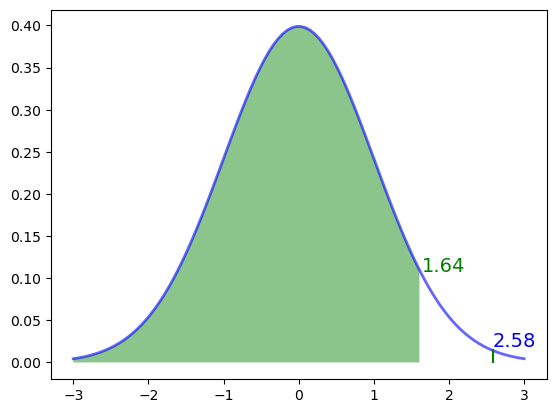

In [4]:
# Draw the PDF
x = np.linspace(-3 ,3, 100)
plt.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.6)

# Draw the accept area and mark the z-critical
x_fill = x[x < z_critical]
plt.fill_between(x_fill, 0, norm.pdf(x_fill), facecolors='green', alpha=0.45)
plt.text(z_critical, norm.pdf(z_critical), f'{z_critical:.2f}', ha='left', va='bottom', color='green', fontsize=14)

# Mark the calculated z-value
plt.plot([z_calculated, z_calculated], [0, norm.pdf(z_calculated)], 'g-')
plt.text(z_calculated, norm.pdf(z_calculated), f'{z_calculated:.2f}', ha='left', va='bottom', color='blue', fontsize=14);

This plot shows that $z_{critical} = 1.64$ and $z_{calculated} = 2.58$. FTR (fail to reject) area covers the interval from negative infinity to $z_{critical}$, and $z_{calculated}$ does not fall within the accept area.

So, we can **_reject_** the null hypothesis $H_0$ which can be interpreted as it is not an _enough sample size_ to accept $H_0$.

### Expected result

<img src = "hometask1_expected.png" width="570" align="left">

## Home Task 2. Hypothesis Testing for Difference of Two Means 

A business owner is in the process of deciding whether or not to invest in a new factory that refines oil in order to meet the high demand that commodity. A test showed that the old factory refines oil at a mean rate of `3.1` liters per second at a standard deviation of `1.0` using a sample of `40`. <br>
The new factory was measured to refine oil at a mean rate of `3.8` liters per second at a standard deviation of `1.5` using a sample of `36`.

Determine if there is any major difference at 10% significance level

**Note**: Since sample size is larger than 30, you may use normal distribution to compute the **z-critical** (standard deviation of two populations is known). 

To compute the **z-value** (z-calculated for two means) use the same formula as for **t-value** above: 

$$z_{calculated} = \frac {(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

---

Let the values related to the old factory have index $1$, and the values related to the new factory have index $2$. So the oil refinig parameters of the old factory:

 - mean $\bar{x}_1 = 3.1$
 - standard deviation $\sigma_1 = 1$
 - sample size $n_1 = 40$

The parameters of the new factory:

 - mean $\bar{x}_2 = 3.8$
 - standard deviation $\sigma_2 = 1.5$
 - sample size $n_1 = 36$


The `null hypothesis` $H_0$ states that means of two populations ($\mu_1$ and $\mu_2$) are equal. More formally, their difference is equal to zero

$$H_0: \mu_1 = \mu_2 \quad (H_0: \mu_1 - \mu_2 = 0)$$

And `alternative hypothesis` $H_1$ is states that two means are unequal (their difference is not equal to zero)

$$H_1: \mu_1 \ne \mu_2 \quad (H_1: \mu_1 - \mu_2 \ne 0)$$

Since significance level is $10\%$, the confidence level is $100\% - 10\% = 90\%$. If we accepting the null hypothesis $H_0$, then difference of sample means is in the confidence interval with probability of $90\%$.

In [5]:
# Define parameters of the old factory
x_1 = 3.1
sigma_1 = 1
n_1 = 40

# Define parameters of the new factory
x_2 = 3.8
sigma_2 = 1.5
n_2 = 36

# Define significance and confidence level
significance = 0.1
confidence = 1 - significance

print('Task variables:')
print('mean of the 1st sample (x_1):', x_1)
print('mean of the 2nd sample (x_2):', x_2)
print('(mu_1 = mu_2)')
print('standard deviation of the 1st sample):', sigma_1)
print('standard deviation of the 2nd sample):', sigma_2)
print('size of the 1st sample):', n_1)
print('size of the 2nd sample):', n_2)
print('significance level:', significance)
print('confidence level:', confidence)

Task variables:
mean of the 1st sample (x_1): 3.1
mean of the 2nd sample (x_2): 3.8
(mu_1 = mu_2)
standard deviation of the 1st sample): 1
standard deviation of the 2nd sample): 1.5
size of the 1st sample): 40
size of the 2nd sample): 36
significance level: 0.1
confidence level: 0.9


In this task we use `equal` sign, so it has two tails which have $10\%$ significance probability, $10\% : 2 = 5\%$ for each. The value $\pm z_{critical}$ defines the limits of the confidence interval. We can get $z_{critical}$ as argument of CDF with value of $5\%$.

Using formula we also can calculate $z_{calculated}$

$$z_{calculated} = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} = \frac{(3.1 - 3.8) - 0)}{\sqrt{\frac{1^2}{40} + \frac{1.5^2}{36}}} = -2.37$$

In [6]:
# Get the z-critical using PPF (inverse of CDF)
z_critical = norm.ppf(significance / 2)

# Calculate the z-value
z_calculated = ((x_1 - x_2) - 0) / np.sqrt(sigma_1**2/n_1 + sigma_2**2/n_2)

print(f'z-critical: {z_critical:.2f}')
print(f'z-value: {z_calculated:.2f}')

z-critical: -1.64
z-value: -2.37


Now we draw the PDF-plot to make conclusions.

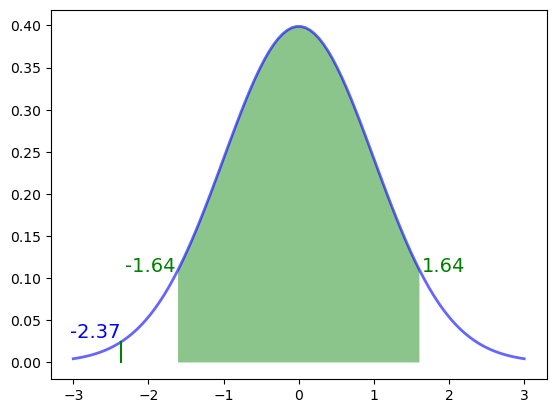

In [7]:
# Draw the PDF
x = np.linspace(-3 ,3, 100)
plt.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.6)

# Draw the accept area and mark the positive & negative z-critical
x_fill = x[(x > z_critical)&(x < -z_critical)]
plt.fill_between(x_fill, 0, norm.pdf(x_fill), facecolors='green', alpha=0.45)
plt.text(z_critical, norm.pdf(z_critical), f'{z_critical:.2f}', ha='right', va='bottom', color='green', fontsize=14)
plt.text(-z_critical, norm.pdf(-z_critical), f'{-z_critical:.2f}', ha='left', va='bottom', color='green', fontsize=14)

# Mark the calculated z-value
plt.plot([z_calculated, z_calculated], [0, norm.pdf(z_calculated)], 'g-')
plt.text(z_calculated, norm.pdf(z_calculated), f'{z_calculated:.2f}', ha='right', va='bottom', color='blue', fontsize=14);

Based on this plot, we can say that, to accept $H_0$, the difference $\bar{x}_1 - \bar{x}_2$ may be include in the interval $((\bar{x}_1 - \bar{x}_2) - 1.64, (\bar{x}_1 - \bar{x}_2) + 1.64)$. In this case, $z_{calculated}$ is located outside the FTR area.

So, null hypothesis $H_0$ is **_rejected_**. *The sample sizes are sufficient* to reject $H_0$ and accept the alternative hypothesis $H_1$.